In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data description

In [23]:
customer_data = pd.read_csv('CustomerData.csv')
customer_data.head()

,CustomerKey,IncomeGroup,BikeBuyer,GeographyKey,FullName,Age,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,MaritalStatus,NumberCarsOwned,MonthsSinceLastPurchase,CommuteDistance
0,11000,High,1,26,Jon Yang,49,M,90000.0,2,0,Bachelors,Professional,1,M,0,27,1-2 Miles
1,11001,Moderate,1,37,Eugene Huang,45,M,60000.0,3,3,Bachelors,Professional,0,S,1,20,0-1 Miles
2,11002,Moderate,1,31,Ruben Torres,50,M,60000.0,3,3,Bachelors,Professional,1,M,1,30,2-5 Miles
3,11003,High,1,11,Christy Zhu,48,F,70000.0,0,0,Bachelors,Professional,0,S,1,27,5-10 Miles
4,11004,High,1,19,Elizabeth Johnson,42,F,80000.0,5,5,Bachelors,Professional,1,S,4,27,1-2 Miles


### Missing values?

In [24]:
(customer_data.isnull()).any()

CustomerKey                False
IncomeGroup                False
BikeBuyer                  False
GeographyKey               False
FullName                   False
Age                        False
Gender                     False
YearlyIncome               False
TotalChildren              False
NumberChildrenAtHome       False
EnglishEducation           False
EnglishOccupation          False
HouseOwnerFlag             False
MaritalStatus              False
NumberCarsOwned            False
MonthsSinceLastPurchase    False
CommuteDistance            False
dtype: bool

### Bike buyers

In [25]:
customer_data.BikeBuyer.describe()

count    18484.000000
mean         0.494049
std          0.499978
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: BikeBuyer, dtype: float64

In [26]:
customer_data.BikeBuyer.value_counts(normalize=True)

0    0.505951
1    0.494049
Name: BikeBuyer, dtype: float64

['IncomeGroup', 'Gender', 'YearlyIncome', 'EnglishEducation', 'EnglishOccupation', 'HouseOwnerFlag', 'MaritalStatus', 'CommuteDistance']


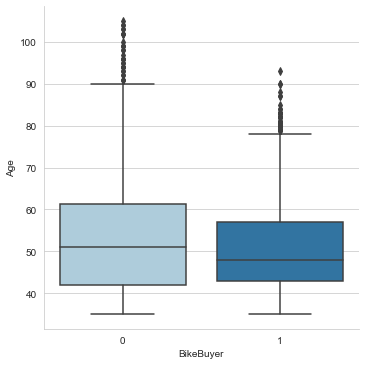

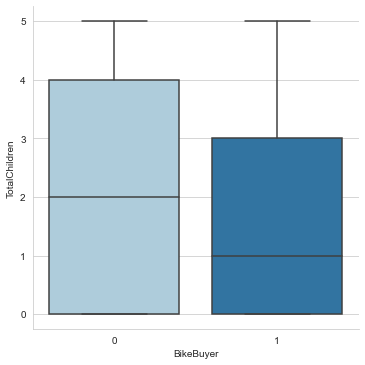

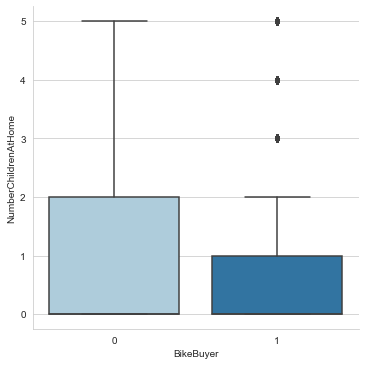

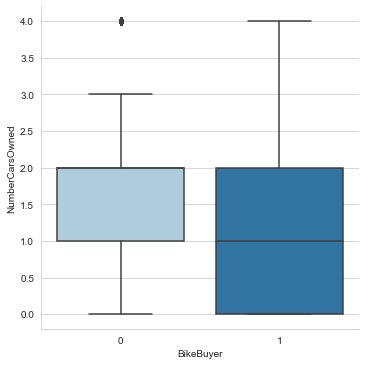

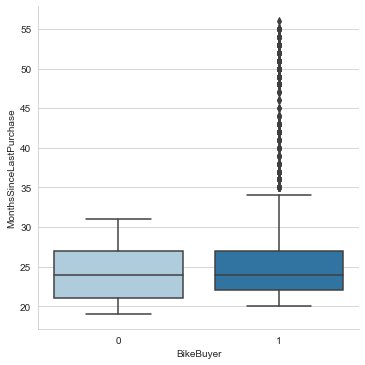

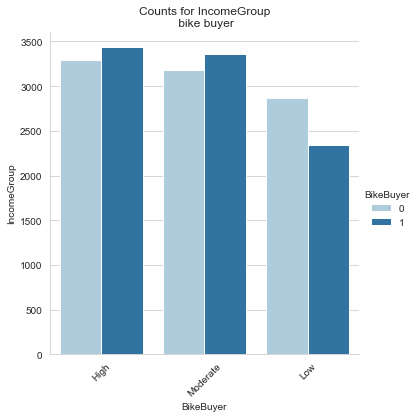

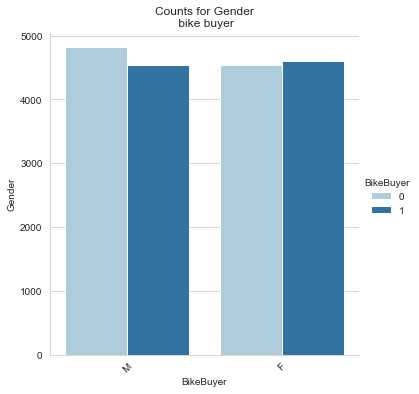

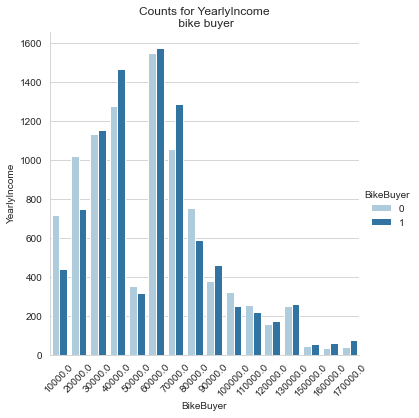

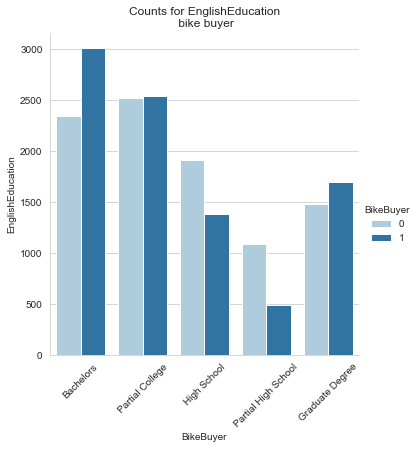

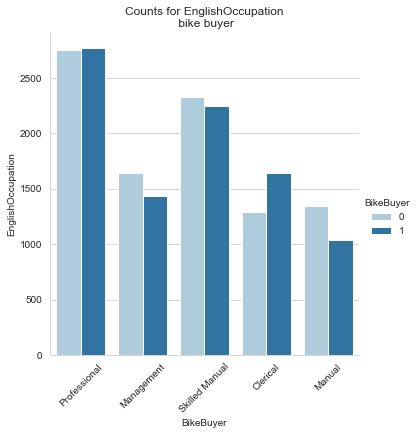

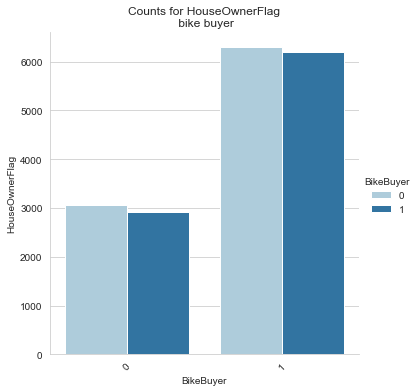

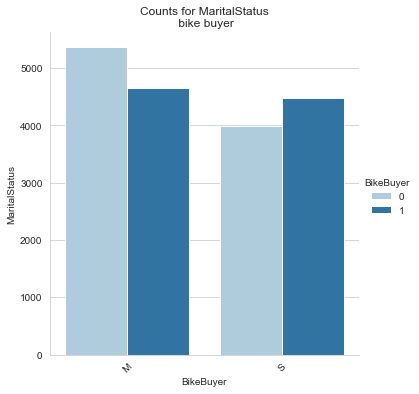

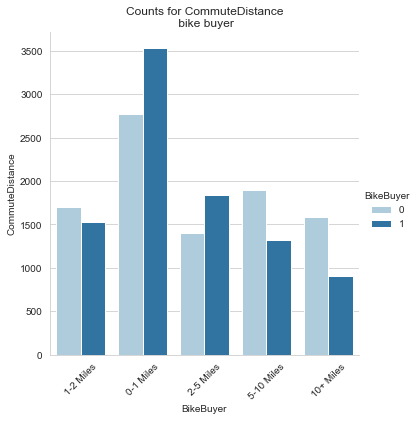

In [27]:
def plot_box(data, cols, kind):
    for col in cols:
        sns.set_style("whitegrid")
        if kind == 'box':
            sns.catplot(x='BikeBuyer', y=col, data=data, kind=kind, palette="Paired")
            plt.title('')
        else:
            sns.catplot(x=col, hue="BikeBuyer", data=data, kind=kind, palette="Paired")
            plt.xticks(rotation=45)
            plt.title('Counts for ' + col + '\n bike buyer')

        plt.xlabel('BikeBuyer')
        plt.ylabel(col)
        plt.show()


columns = (list(customer_data.head().columns))
columns.remove('CustomerKey')
columns.remove('BikeBuyer')
columns.remove('FullName')
columns.remove('GeographyKey')

cols = ['Age', 'TotalChildren', 'NumberChildrenAtHome', 'NumberCarsOwned', 'MonthsSinceLastPurchase']
cols2 = [col for col in columns if col not in cols]
print(cols2)

plot_box(customer_data, cols, kind='box')
plot_box(customer_data, cols2, kind='count')

features = ['YearlyIncome', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'Age']
categorical_features = ['IncomeGroup', 'CommuteDistance', 'EnglishEducation']

### Adding one-hot-encoded columns for categorical data

In [28]:
import numpy as np

processed_data = customer_data[features + categorical_features]
processed_data = pd.get_dummies(processed_data, columns=categorical_features)

labels = np.array(customer_data.BikeBuyer)
processed_data.head()

,YearlyIncome,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,Age,IncomeGroup_High,IncomeGroup_Low,IncomeGroup_Moderate,CommuteDistance_0-1 Miles,CommuteDistance_1-2 Miles,CommuteDistance_10+ Miles,CommuteDistance_2-5 Miles,CommuteDistance_5-10 Miles,EnglishEducation_Bachelors,EnglishEducation_Graduate Degree,EnglishEducation_High School,EnglishEducation_Partial College,EnglishEducation_Partial High School
0,90000.0,0,0,2,49,1,0,0,0,1,0,0,0,1,0,0,0,0
1,60000.0,1,3,3,45,0,0,1,1,0,0,0,0,1,0,0,0,0
2,60000.0,1,3,3,50,0,0,1,0,0,0,1,0,1,0,0,0,0
3,70000.0,1,0,0,48,1,0,0,0,0,0,0,1,1,0,0,0,0
4,80000.0,4,5,5,42,1,0,0,0,1,0,0,0,1,0,0,0,0


### Evaluate random forest algorithm for classification

In [29]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
n_scores = cross_val_score(model, processed_data, labels, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print(f'Mean accuracy over all repeats: {mean(n_scores) * 100} %')

Mean accuracy over all repeats: 77.58705419332786 %


### Linear regression feature importance

In [30]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# define dataset
X1, y1 = make_regression(n_samples=len(processed_data), n_features=len(processed_data.columns),
                         n_informative=len(processed_data.columns), random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X1, y1)
importance = model.coef_
importance = np.array(importance)
importance = np.sort(importance)[::-1]

d = {}
for i, v in enumerate(importance):
    d[list(processed_data.columns)[i]] = v

df = pd.DataFrame(data=d, index=['A']).T

In [31]:
df

,A
YearlyIncome,96.389944
NumberCarsOwned,89.127483
NumberChildrenAtHome,88.556945
TotalChildren,87.232184
Age,81.970509
IncomeGroup_High,72.275539
IncomeGroup_Low,55.885995
IncomeGroup_Moderate,55.640726
CommuteDistance_0-1 Miles,54.507517
CommuteDistance_1-2 Miles,47.845116
